<a href="https://colab.research.google.com/github/Amith1434/My_Multiclass_Classification_model/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import torch
from torch import nn
from sklearn.datasets import make_blobs

In [103]:
torch.manual_seed(42)
X,y=make_blobs(n_samples=1000,
               n_features=2,
               centers = 4,
               cluster_std =1.5,
               random_state = 42)

In [104]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [105]:
X.shape

(1000, 2)

In [106]:
X_blob=torch.from_numpy(X).type(torch.float)
y_blob=torch.from_numpy(y).type(torch.float)

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X_blob,y_blob,random_state=42,test_size=.3)

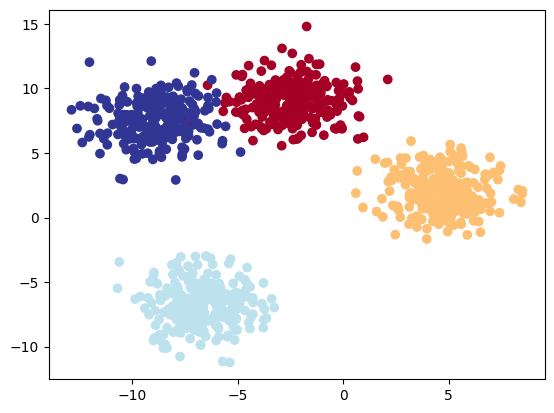

In [108]:
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [109]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.

        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter

    n_features : int, default=2
        The number of features for each sample.

    centers : int or array-like of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and cen

In [137]:
model = nn.Sequential(nn.Linear(2,8),
                      nn.ReLU(),
                      nn.Linear(8,8),
                      nn.ReLU(),
                      nn.Linear(8,4))
model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=4, bias=True)
)

In [138]:
class Multiclass_classification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2,8)
    self.layer2 = nn.Linear(8,8)
    self.layer3 = nn.Linear(8,4)
    self.relu = nn.ReLU()
  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [139]:
model0 = Multiclass_classification()
model0

Multiclass_classification(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
)

Both model and model0 are the same choose which is easy for you

In [140]:
#define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=.01)

In [141]:
##just for fun let's see what the model will predict before training
model.eval()
with torch.inference_mode():
  y_logits = model(X_test)
  print("y_logits dim : ",y_logits.shape)
  y_preds = torch.argmax(torch.softmax(y_logits,dim =1),dim=1)

  print("y_preds dim : ",y_preds.shape)

y_logits dim :  torch.Size([300, 4])
y_preds dim :  torch.Size([300])


###Training the model

In [142]:
def accuracy_fn(y_true,y_preds):
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = (correct/len(y_preds))*100
  return acc

In [143]:
y_train = y_train.type(torch.LongTensor)

y_test = y_test.type(torch.LongTensor)

print("Done")

Done


In [144]:
epochs = 1000
for epoch in range(epochs):
  model.train()

  y_logits = model(X_train)
  y_preds = torch.argmax(torch.softmax(y_logits,dim = 1),dim = 1)

  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():

    y_test_logits = model(X_test)
    y_test_preds = torch.argmax(torch.softmax(y_test_logits,dim=1),dim=1)

    test_loss = loss_fn(y_test_logits,y_test_preds)
    test_acc = accuracy_fn(y_test,y_test_preds)

  if epoch%100 == 0:
    print(f"Epoch : {epoch}  |  Train Loss : {loss:.2f}  |  Train Acc : {accuracy:.2f}  |  Test loss : {test_loss:.2f}  |  Test Acc : {test_acc:.2f}")

Epoch : 0  |  Train Loss : 1.39  |  Train Acc : 46.00  |  Test loss : 0.81  |  Test Acc : 48.67
Epoch : 100  |  Train Loss : 0.67  |  Train Acc : 70.57  |  Test loss : 0.58  |  Test Acc : 75.00
Epoch : 200  |  Train Loss : 0.46  |  Train Acc : 94.57  |  Test loss : 0.41  |  Test Acc : 94.00
Epoch : 300  |  Train Loss : 0.37  |  Train Acc : 97.14  |  Test loss : 0.33  |  Test Acc : 98.67
Epoch : 400  |  Train Loss : 0.31  |  Train Acc : 97.86  |  Test loss : 0.27  |  Test Acc : 98.67
Epoch : 500  |  Train Loss : 0.27  |  Train Acc : 98.43  |  Test loss : 0.23  |  Test Acc : 99.00
Epoch : 600  |  Train Loss : 0.24  |  Train Acc : 98.43  |  Test loss : 0.20  |  Test Acc : 99.00
Epoch : 700  |  Train Loss : 0.21  |  Train Acc : 98.71  |  Test loss : 0.18  |  Test Acc : 99.00
Epoch : 800  |  Train Loss : 0.19  |  Train Acc : 98.86  |  Test loss : 0.16  |  Test Acc : 99.00
Epoch : 900  |  Train Loss : 0.17  |  Train Acc : 98.86  |  Test loss : 0.14  |  Test Acc : 99.00


In [145]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

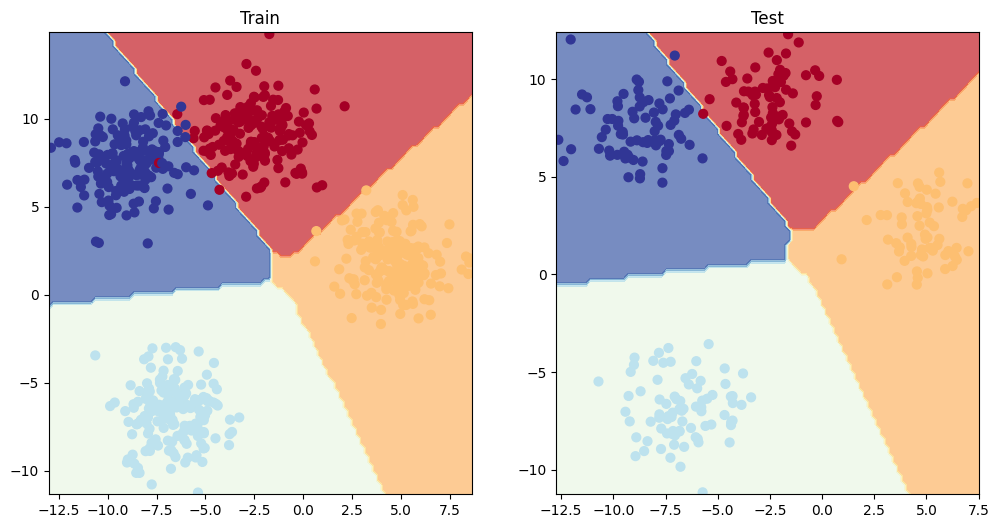

In [151]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
#